In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip (lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | taga
Processing Record 4 of Set 1 | itarema
Processing Record 5 of Set 1 | el nispero
Processing Record 6 of Set 1 | batticaloa
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | thiene
Processing Record 9 of Set 1 | byron bay
Processing Record 10 of Set 1 | nizwa
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | nuuk
Processing Record 13 of Set 1 | castleisland
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | mendahara
City not found. Skipping...
Processing Record 18 of Set 1 | andenes
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | charters towers
Processing Record 23 of

Processing Record 33 of Set 4 | kurgan
Processing Record 34 of Set 4 | carballo
Processing Record 35 of Set 4 | san giovanni rotondo
Processing Record 36 of Set 4 | uliesti
Processing Record 37 of Set 4 | ambanja
Processing Record 38 of Set 4 | inhambane
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | tessalit
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | yuxia
Processing Record 43 of Set 4 | meulaboh
Processing Record 44 of Set 4 | talcahuano
Processing Record 45 of Set 4 | jacareacanga
Processing Record 46 of Set 4 | cabedelo
Processing Record 47 of Set 4 | peru
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | broome
Processing Record 50 of Set 4 | mareeba
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | kamenka
Processing Record 3 of Set 5 | raudeberg
Processing Record 4 of Set 5 | butajira
Processing Record 5 of Set 5 | mataram
Processing Record 6 of Set 5 | pyaozerskiy
Processi

Processing Record 20 of Set 8 | kurilsk
Processing Record 21 of Set 8 | solwezi
Processing Record 22 of Set 8 | iberia
Processing Record 23 of Set 8 | porto velho
Processing Record 24 of Set 8 | puerto escondido
Processing Record 25 of Set 8 | krasnyy klyuch
Processing Record 26 of Set 8 | tallahassee
Processing Record 27 of Set 8 | madang
Processing Record 28 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 29 of Set 8 | bentiu
Processing Record 30 of Set 8 | phangnga
Processing Record 31 of Set 8 | whitehaven
Processing Record 32 of Set 8 | khormuj
City not found. Skipping...
Processing Record 33 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 34 of Set 8 | basco
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | tevaitoa
Processing Record 37 of Set 8 | mastung
Processing Record 38 of Set 8 | katherine
Processing Record 39 of Set 8 | praxedis guerrero
Processing Record 40 of Set 8 | gweta
Processing Record 41 of Set 

Processing Record 5 of Set 12 | moyobamba
Processing Record 6 of Set 12 | key largo
Processing Record 7 of Set 12 | saint-joseph
Processing Record 8 of Set 12 | shaunavon
Processing Record 9 of Set 12 | tupik
Processing Record 10 of Set 12 | katangli
Processing Record 11 of Set 12 | gamba
Processing Record 12 of Set 12 | whitehorse
Processing Record 13 of Set 12 | ygatimi
Processing Record 14 of Set 12 | belonia
Processing Record 15 of Set 12 | pucara
Processing Record 16 of Set 12 | cayenne
Processing Record 17 of Set 12 | crixas
Processing Record 18 of Set 12 | beyla
Processing Record 19 of Set 12 | atherton
Processing Record 20 of Set 12 | ocean city
Processing Record 21 of Set 12 | yuksekova
Processing Record 22 of Set 12 | kavaratti
Processing Record 23 of Set 12 | amahai
Processing Record 24 of Set 12 | burnie
Processing Record 25 of Set 12 | esmeraldas
Processing Record 26 of Set 12 | nanticoke
Processing Record 27 of Set 12 | along
Processing Record 28 of Set 12 | bonthe
Proces

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.21,76,61,18.61,PF,2022-05-09 00:00:53
1,Jamestown,42.0970,-79.2353,51.71,73,1,7.63,US,2022-05-08 23:59:12
2,Taga,46.9500,24.0500,52.32,89,100,1.79,RO,2022-05-09 00:05:22
3,Itarema,-2.9248,-39.9167,77.14,90,100,8.30,BR,2022-05-09 00:02:00
4,El Nispero,14.7667,-88.3333,83.01,87,43,5.26,HN,2022-05-09 00:05:22
5,Batticaloa,7.7102,81.6924,82.09,77,100,6.26,LK,2022-05-09 00:05:23
6,Albany,42.6001,-73.9662,61.45,59,100,4.21,US,2022-05-09 00:00:17
7,Thiene,45.7088,11.4796,62.29,73,70,1.99,IT,2022-05-09 00:05:24
8,Byron Bay,-28.6500,153.6167,62.94,77,100,11.14,AU,2022-05-09 00:00:46
9,Nizwa,22.9333,57.5333,81.82,26,0,0.72,OM,2022-05-09 00:05:24


In [10]:
new_column_order =["City",'Country','Date','Lat','Lng',"Max Temp",'Humidity','Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-09 00:00:53,-23.1203,-134.9692,76.21,76,61,18.61
1,Jamestown,US,2022-05-08 23:59:12,42.0970,-79.2353,51.71,73,1,7.63
2,Taga,RO,2022-05-09 00:05:22,46.9500,24.0500,52.32,89,100,1.79
3,Itarema,BR,2022-05-09 00:02:00,-2.9248,-39.9167,77.14,90,100,8.30
4,El Nispero,HN,2022-05-09 00:05:22,14.7667,-88.3333,83.01,87,43,5.26
5,Batticaloa,LK,2022-05-09 00:05:23,7.7102,81.6924,82.09,77,100,6.26
6,Albany,US,2022-05-09 00:00:17,42.6001,-73.9662,61.45,59,100,4.21
7,Thiene,IT,2022-05-09 00:05:24,45.7088,11.4796,62.29,73,70,1.99
8,Byron Bay,AU,2022-05-09 00:00:46,-28.6500,153.6167,62.94,77,100,11.14
9,Nizwa,OM,2022-05-09 00:05:24,22.9333,57.5333,81.82,26,0,0.72


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Lat vs Temp.

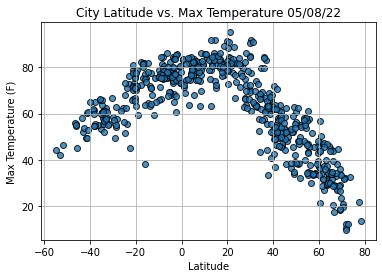

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Lat vs Humidity

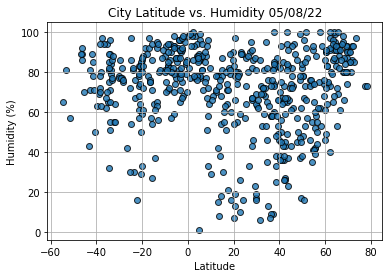

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Lat vs Cloudiness

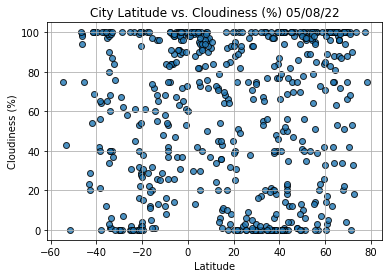

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Lat vs Wind Speed

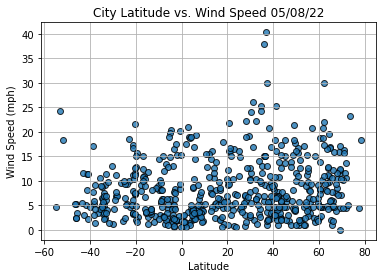

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()